In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_json("data.json")
df.head()
# df.tail()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


<Axes: >

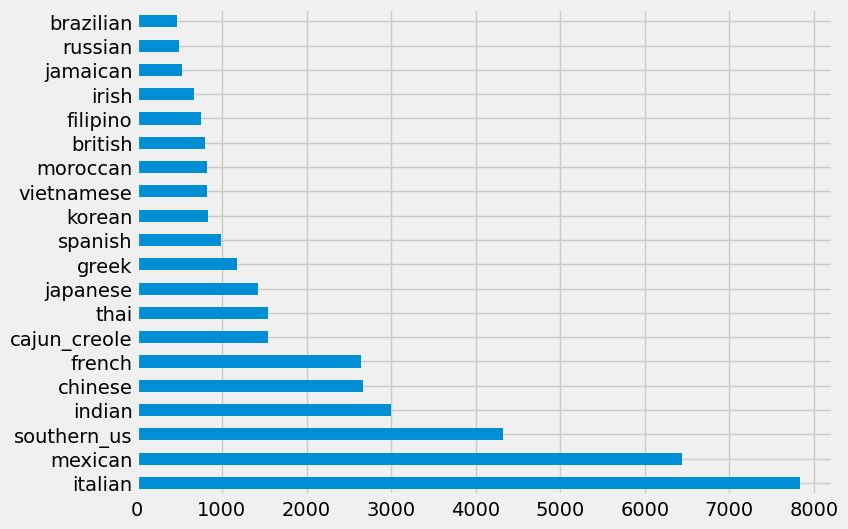

In [4]:
# смотрим в каком соотношении встречаются различные кухни
%matplotlib inline
plt.style.use("fivethirtyeight")
df["cuisine"].value_counts().plot(kind="barh", figsize=(8, 6))

In [5]:
#Счетчик: Количество повторений каждого ингредиента в каждой кухне
from collections import Counter
counters = {}
for cuisine in df["cuisine"].unique():
    counters[cuisine] = Counter()
    indices = df["cuisine"] == cuisine
    for ingredients in df[indices]["ingredients"]:
        counters[cuisine].update(ingredients)

In [6]:
#вывод самых часто встречающихся ингридиентов
print(counters["indian"].most_common(5))
top5 = pd.DataFrame(
    [[items[0] for items in counters[cuisine].most_common(5)] for cuisine in counters],
    index=[cuisine for cuisine in counters],
    columns=["top{}".format(i) for i in range(1, 6)],
)
display(top5)

[('salt', 1934), ('onions', 1195), ('garam masala', 862), ('water', 820), ('ground turmeric', 728)]


,top1,top2,top3,top4,top5
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles
southern_us,salt,butter,all-purpose flour,sugar,large eggs
filipino,salt,garlic,water,onions,soy sauce
indian,salt,onions,garam masala,water,ground turmeric
jamaican,salt,onions,water,garlic,ground allspice
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic
mexican,salt,onions,ground cumin,garlic,olive oil
chinese,soy sauce,sesame oil,salt,corn starch,sugar
british,salt,all-purpose flour,butter,milk,eggs


In [3]:
# количество ингредиентов в рецепте
df['num_ing'] = df['ingredients'].str.len()
num_ing = df['num_ing'].to_numpy()
print("Среднее кол-во ингредиентов в рецепте:",np.mean(num_ing))
df.head()

Среднее кол-во ингредиентов в рецепте: 10.76771257605471


,id,cuisine,ingredients,num_ing
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20


<Axes: xlabel='num_ing', ylabel='count'>

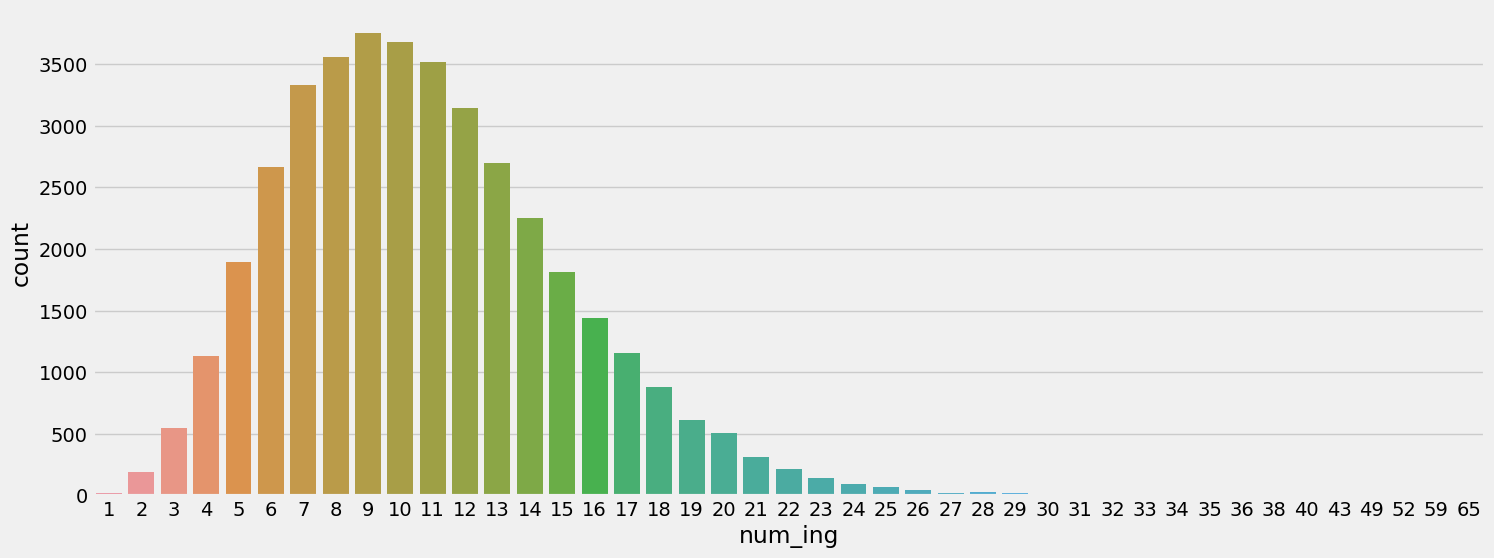

In [8]:
# график: кол-во рецептов от кол-ва ингредиентов
plt.figure(figsize=(16,6))
sns.countplot(x='num_ing',data=df)

In [9]:
# сколько рецептов содержит больше/меньше, чем i ингредиентов
i = 24
longrecip = df[df['num_ing'] >= i]
print(len(longrecip))

longrecip1 = df[df['num_ing'] < i]
print(len(longrecip1))

332
39442


In [10]:
#самый длинный рецепт
print(longrecip[longrecip['num_ing'] == 65]['ingredients'].values)
print('Cuisine :-',longrecip[longrecip['num_ing'] == 65]['cuisine'].values)

[list(['fettucine', 'fresh marjoram', 'minced garlic', 'olive oil', 'garlic powder', 'large eggs', 'Alfredo sauce', 'vegetable oil', 'cajun seasoning', 'shredded romano cheese', 'basil dried leaves', 'salt', 'cayenne pepper', 'scallions', 'red bell pepper', 'boneless skinless chicken breast halves', 'soba', 'pasta sauce', 'kosher salt', 'milk', 'fresh ginger', 'ground black pepper', 'flour', 'cooked chicken', 'coarse salt', 'lemon', 'diced tomatoes', 'garlic', 'rice vinegar', 'Neufchâtel', 'garlic cloves', 'dried parsley', 'frozen artichoke hearts', 'penne', 'pepper', 'sweet onion', 'part-skim mozzarella cheese', 'parmigiano reggiano cheese', 'basil leaves', 'onion powder', 'red wine vinegar', 'red pepper flakes', 'orzo', 'crushed red pepper', 'all-purpose flour', 'freshly ground pepper', 'sliced mushrooms', 'panko breadcrumbs', 'plum tomatoes', 'fresh basil', 'fresh leav spinach', 'water', 'sun-dried tomatoes', 'ground pepper', 'grated parmesan cheese', 'boneless skinless chicken brea

ЭТО НЕ РЕЦЕПТ </p>
Кухня:итальянская. </p>
'феттучини', 'свежий майоран', 'фарш из чеснока', 'оливковое масло', 'чесночный порошок', 'большие яйца', 'соус Альфредо', 'растительное масло', 'каджунская приправа', 'тертый сыр романо», «сушеные листья базилика», «соль», «кайенский перец», «зеленый лук», «красный болгарский перец», «половинки куриной грудки без кожи и костей», «соба», «соус для пасты», «кошерная соль» , «молоко», «свежий имбирь», «молотый черный перец», «мука», «вареная курица», «крупная соль», «лимон», «нарезанные кубиками помидоры», «чеснок», «рисовый уксус», «Невшатель». ', 'зубчики чеснока', 'сушеная петрушка', 'замороженные сердцевины артишоков', 'пенне', 'перец', 'сладкий лук', 'сыр моцарелла частично обезжиренный', 'сыр пармезан-реджано', 'листья базилика', «луковый порошок», «уксус красный винный», «хлопья красного перца», «орзо», «перец красный молотый», «мука общего назначения», «перец свежемолотый», «грибы нарезанные», «сухари панко», «сливовые помидоры», «базилик свежий», «шпинат свежий листовой», «вода», «вяленые помидоры», «перец молотый», «тертый сыр пармезан», «куриные грудки без кожи и костей», «куриные котлеты», 'сливочное масло', 'многозерновая паста пенне', 'оливковое масло первого отжима', 'листья кинзы', 'зеленый перец', 'тертый сыр моцарелла', 'свежая петрушка', 'спагетти'


In [11]:
#ЭТО ТОЖЕ НЕ РЕЦЕПТЫ
df[df['num_ing'] <= 2]

,id,cuisine,ingredients,num_ing
88,17004,korean,"[water, barley]",2
143,29853,mexican,"[granulated sugar, large egg whites]",2
445,8304,italian,"[aged gouda, soppressata]",2
940,4734,japanese,[sushi rice],1
970,36852,italian,"[melted butter, potatoes]",2
...,...,...,...,...
38897,19077,vietnamese,"[shallots, salad oil]",2
38966,28903,filipino,"[adobo, cooking oil]",2
39031,7984,italian,"[olive oil, fresh basil leaves]",2
39035,27327,british,"[puff pastry, minced meat]",2


In [4]:
# Удаляем рецепты с кол-вом ингредиентов меньше двух и больше 24
i_2 = df[df['num_ing'] <= 2].index
df = df.drop(i_2)
i_24 = df[df['num_ing'] >= 24].index
df = df.drop(i_24)

In [13]:
# можно удалить часть блюд из самых часто встречающихся кухонь
i_italian = df[(df['cuisine'] == 'italian') & (df['num_ing'] > 0)].index
print('i_italian', len(i_italian))
i_mexican = df[(df['cuisine'] == 'mexican') & (df['num_ing'] > 0)].index
print('i_mexican', len(i_mexican))
i_southern_us	 = df[(df['cuisine'] == 'southern_us') & (df['num_ing'] > 0)].index
print('i_southern_us', len(i_southern_us))
# df = df.drop(i_italian[0:3000])
# df = df.drop(i_mexican[0:2000])
# df = df.drop(i_southern_us[0:500])

i_italian 7782
i_mexican 6340
i_southern_us 4278


In [5]:
# приводим ингредиенты к одному регистру, убираем цифры и знаки препинания
# import string
# result = string.punctuation
string = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’0123456789'

# создание новой таблицы
new_df = df[['id', 'cuisine']].copy()
new_ingredients = []
for list_ingredients in df['ingredients']:
  # перевод ингредиентов в нижний регистр
  my_list = [x.lower() for x in list_ingredients]
  l_i = []
  for ingredient in my_list:
    ingredient_0 = ingredient
    for p in string:
      while p in ingredient_0:
        ingredient_0 = ingredient_0.replace(p, '')
    l_i.append(ingredient_0)
  new_ingredients.append(l_i)

new_df['ingredients'] = new_ingredients

In [ ]:
# ***проверка цикла***
string = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’0123456789'
listingredients = ['Scotch whisky', 'Zatarain’s Jambalaya Mix', 'medium-grain rice','33% less sodium cooked ham']

mylist = [x.lower() for x in listingredients]
li = []
for ingredient in mylist:
  ingredient0 = ingredient
  for p in string:
    while p in ingredient0:
      ingredient0 = ingredient0.replace(p, '')
  li.append(ingredient0)
print(li)

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39227 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39227 non-null  int64 
 1   cuisine      39227 non-null  object
 2   ingredients  39227 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [6]:
# список всех ингредиентов
all_ing = [ing for ingredients in new_df['ingredients'] for ing in ingredients]
print('len all ingredients:', len(all_ing))
# формируем список уникальных ингредиентов
all_ingredients = list(set(all_ing))
print('len unique ingredients:', len(all_ingredients))

len all ingredients: 418867
len unique ingredients: 6652


In [7]:
# ингредиенты из двух букв, это не ингредиенты
false_ingredients = [ingredient for ingredient in all_ingredients if len(ingredient) <= 2]
print(false_ingredients)
for p in false_ingredients:
  all_ingredients.remove(p)
print('len unique ingredients:', len(all_ingredients))

# уберем воду, соль и тд
unnecessary_ingredients = ['water', 'salt', 'garlic', 'onions',	'olive oil', 'sugar']
for p in unnecessary_ingredients:
  all_ingredients.remove(p)
print('len unique ingredients:', len(all_ingredients))

['v', 'mi']
len unique ingredients: 6650
len unique ingredients: 6644


In [8]:
# проверка
print(list(set([ingredient for ingredient in all_ingredients if re.findall('[A-Z]+', ingredient)]))[:3])
print(list(set([ingredient for ingredient in all_ingredients if '’' in ingredient]))[0:3])
print(list(set([ingredient for ingredient in all_ingredients if re.findall('-', ingredient)]))[:3])
print(list(set([ingredient for ingredient in all_ingredients if re.findall('[0-9]', ingredient)]))[:3])

[]
[]
[]
[]


Вывод для исходных данных: </p>
['Scotch whisky', 'Saffron Road Vegetable Broth', 'Sangiovese']</p>
['Zatarain’s Jambalaya Mix', 'sheep’s milk cheese', 'Breakstone’s Sour Cream']</p>
['medium-grain rice', 'chicken demi-glace', 'low-sodium low-fat chicken broth']</p>
['33% less sodium cooked ham', '1% low-fat buttermilk', 'Yoplait® Greek 100 blackberry pie yogurt']

In [9]:
# ***создание рабочей таблицы***
df_cuisine = new_df[['id', 'cuisine']].copy()

for p in all_ingredients:
  value = []
  for list_ingredients in new_df['ingredients']:
    if p in list_ingredients:
      value.append(1)
    else:
      value.append(0)
  df_cuisine[p] = np.array(value)


In [20]:
df_cuisine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39227 entries, 0 to 39773
Columns: 6646 entries, id to mint
dtypes: int64(6645), object(1)
memory usage: 1.9+ GB


In [10]:
# X - входные данные (набор ингредиентов)
# Y - выход (кухня)
y = df_cuisine.cuisine # столбец кухня
X = df_cuisine.drop('cuisine', axis=1) # все, кроме кухни

In [11]:
# разделение на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

In [15]:
LR_score, RFC_score, KNN_score = 2344, 8402, 2376

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
LR_score = accuracy_score(y_test, y_pred, normalize=False)
print('len y_test:', len(y_test))
print('score:', LR_score)

pd.DataFrame(data = confusion_matrix(y_test, y_pred), columns=model.classes_, index=model.classes_)

len y_test: 11769
score: 2344


,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
brazilian,0,0,0,0,0,0,0,0,0,124,0,0,0,0,0,0,0,0,0,0
british,0,0,0,0,0,0,0,0,0,244,0,0,0,0,0,0,0,0,0,0
cajun_creole,0,0,0,0,0,0,0,0,0,445,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,786,0,0,0,0,0,0,0,0,0,0
filipino,0,0,0,0,0,0,0,0,0,234,0,0,0,0,0,0,0,0,0,0
french,0,0,0,0,0,0,0,0,0,784,0,0,0,0,0,0,0,0,0,0
greek,0,0,0,0,0,0,0,0,0,338,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,862,0,0,0,0,0,0,0,0,0,0
irish,0,0,0,0,0,0,0,0,0,216,0,0,0,0,0,0,0,0,0,0
italian,0,0,0,0,0,0,0,0,0,2344,0,0,0,0,0,0,0,0,0,0


LogisticRegression </p>
len y_test: 11769
score: 2344

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
RFC_score = accuracy_score(y_test,y_pred,normalize=False)
print('len y_test:', len(y_test))
print('score:', RFC_score)

pd.DataFrame(data = confusion_matrix(y_test, y_pred), columns=model.classes_, index=model.classes_)

len y_test: 11769
score: 8402


,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
brazilian,45,0,2,1,1,3,1,5,0,19,0,1,0,31,0,3,14,0,5,0
british,0,34,0,1,2,49,1,6,21,40,0,0,0,6,0,1,69,1,0,0
cajun_creole,1,0,292,2,3,10,0,3,0,52,1,0,0,30,0,2,68,0,0,0
chinese,1,1,1,653,3,3,1,12,0,22,0,16,11,9,0,0,15,0,8,2
filipino,1,1,0,36,109,1,0,8,1,26,0,0,0,6,0,2,14,1,12,12
french,2,10,7,2,2,366,2,7,8,270,0,3,0,13,1,0,63,5,0,0
greek,1,2,0,2,1,14,198,5,1,107,1,1,0,14,3,0,16,2,0,0
indian,0,0,0,4,6,9,4,797,0,10,2,2,2,48,7,0,12,0,7,1
irish,1,8,1,0,1,33,0,2,70,30,0,0,0,9,0,2,49,0,0,0
italian,3,2,3,5,1,74,18,9,3,2149,1,0,0,38,3,4,60,7,2,0


RandomForestClassifier </p>
len y_test: 11769
score: 8402

In [ ]:
# не вывозит ОЗУ
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
LDA_score = accuracy_score(y_test,y_pred,normalize=False)
print('len y_test:', len(y_test))
print('score:', LDA_score)

pd.DataFrame(data = confusion_matrix(y_test, y_pred), columns=model.classes_, index=model.classes_)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# В KNN-модели нужно указать параметр n_neighbors
# Это число точек, на которое будет смотреть
# классификатор, чтобы определить, к какому классу принадлежит новая точка
model = KNeighborsClassifier(n_neighbors=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
KNN_score = accuracy_score(y_test,y_pred,normalize=False)
print('len y_test:', len(y_test))
print('score:', KNN_score)

pd.DataFrame(data = confusion_matrix(y_test, y_pred), columns=model.classes_, index=model.classes_)

len y_test: 11769
score: 2376


,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
brazilian,0,0,0,0,0,0,0,0,0,125,0,0,0,20,0,0,0,0,0,0
british,0,0,0,0,0,0,0,0,0,221,0,0,0,14,0,0,0,0,0,0
cajun_creole,0,0,0,0,0,0,0,0,0,408,0,0,0,37,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,714,0,0,0,62,0,0,0,0,0,0
filipino,0,0,0,0,0,0,0,0,0,188,0,0,0,25,0,0,0,0,0,0
french,0,0,0,0,0,0,0,0,0,726,0,0,0,65,0,0,0,0,0,0
greek,0,0,0,0,0,0,0,0,0,318,0,0,0,26,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,816,0,0,0,56,0,0,0,0,0,0
irish,0,0,0,0,0,0,0,0,0,175,0,0,0,10,0,0,0,0,0,0
italian,0,0,0,0,0,0,0,0,0,2228,0,0,0,156,0,0,0,0,0,0


KNeighborsClassifier: </p>
len y_test: 11769
score: 2376

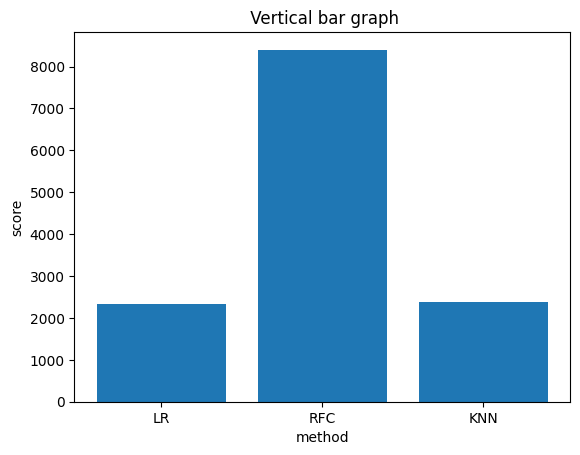

In [16]:
x= ['LR', 'RFC', 'KNN']
y= [LR_score, RFC_score, KNN_score]
plt.bar(x, y)
plt.xlabel("method")
plt.ylabel("score")
plt.title(" Vertical bar graph")
plt.show()

In [ ]:
 # не вывозит ОЗУ
 from sklearn.decomposition import PCA

 pca = PCA()
 X_train_pca = pca.fit_transform(X_train)
 X_test_pca = pca.transform(X_test)

In [1]:
# Garbage Collector - use it like gc.collect()
import gc
gc.collect()

44